In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from get_the_dataset import get_iris, get_breast_cancer
from query_by_committee import query_active_learning
from uncertainty_sampling_s1 import uncertainty_sampling_func
from expected_error_reduction import active_learning_with_eer

## Query by Committee

### Dataset-1: Breast Cancer

In [2]:
X, y = get_breast_cancer()

In [3]:
performance_history, metrics_history = query_active_learning(X, y) 

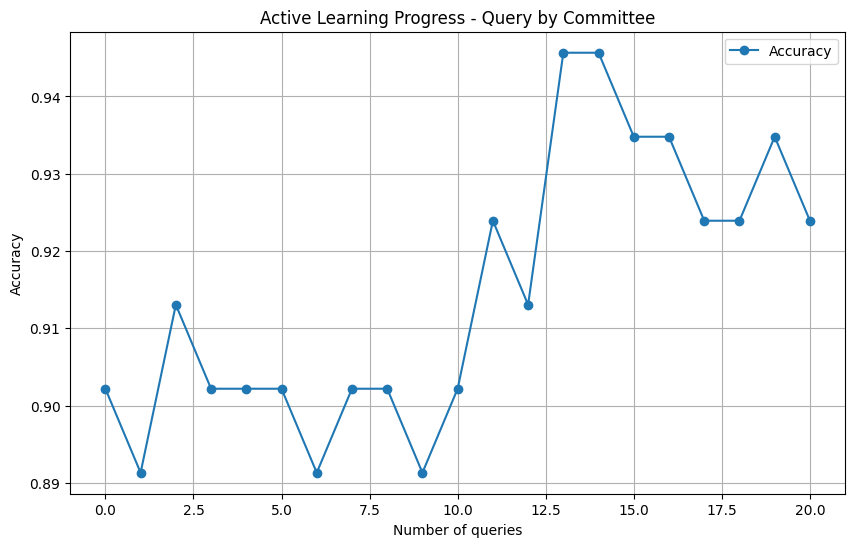

In [4]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(performance_history)), performance_history, marker='o', label='Accuracy')
plt.xlabel('Number of queries')
plt.ylabel('Accuracy')
plt.title('Active Learning Progress - Query by Committee')
plt.legend()
plt.grid(True)
plt.show()

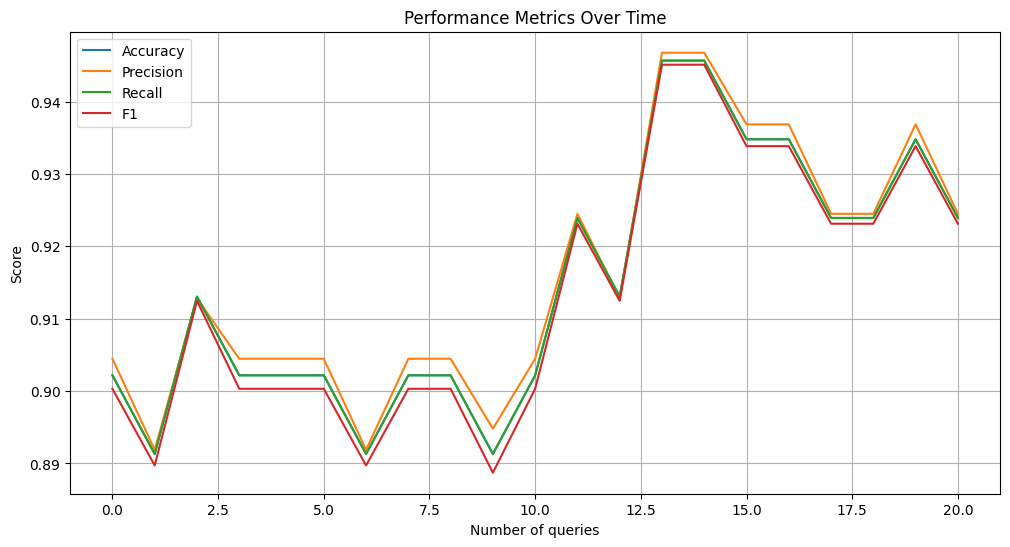

In [5]:
# Plot metrics history
plt.figure(figsize=(12, 6))
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics_names:
    plt.plot([m[metric] for m in metrics_history], label=metric.capitalize())
plt.xlabel('Number of queries')
plt.ylabel('Score')
plt.title('Performance Metrics Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Dataset-2: Iris

In [6]:
X, y = get_iris()

In [7]:
performance_history, metrics_history = query_active_learning(X, y) 

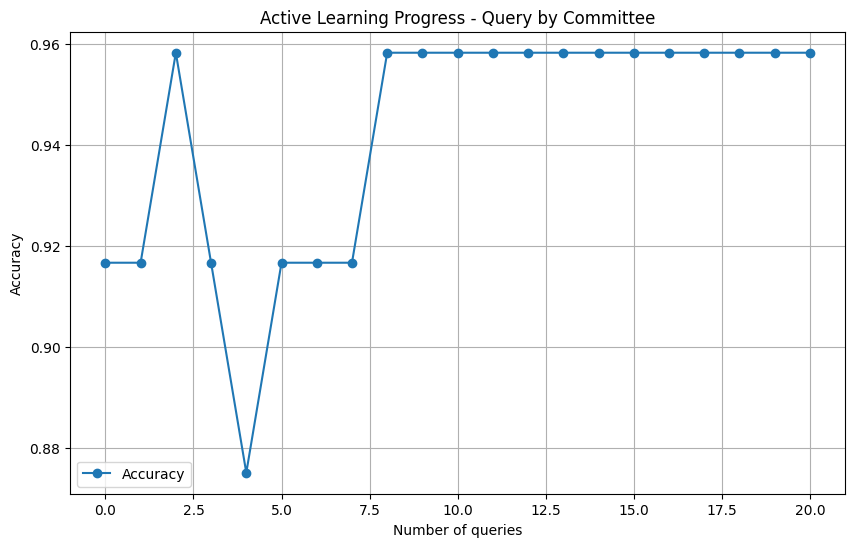

In [8]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(performance_history)), performance_history, marker='o', label='Accuracy')
plt.xlabel('Number of queries')
plt.ylabel('Accuracy')
plt.title('Active Learning Progress - Query by Committee')
plt.legend()
plt.grid(True)
plt.show()

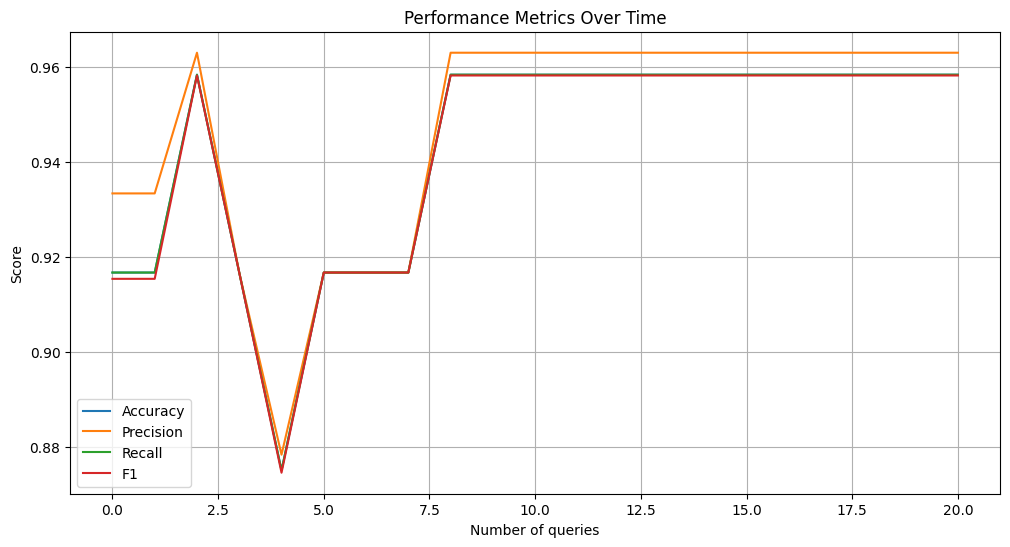

In [9]:
# Plot metrics history
plt.figure(figsize=(12, 6))
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics_names:
    plt.plot([m[metric] for m in metrics_history], label=metric.capitalize())
plt.xlabel('Number of queries')
plt.ylabel('Score')
plt.title('Performance Metrics Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Uncertainty Sampling

### Dataset-1: Breast Cancer

In [10]:
X, y = get_breast_cancer()

In [11]:
accuracy_list = uncertainty_sampling_func(X, y)

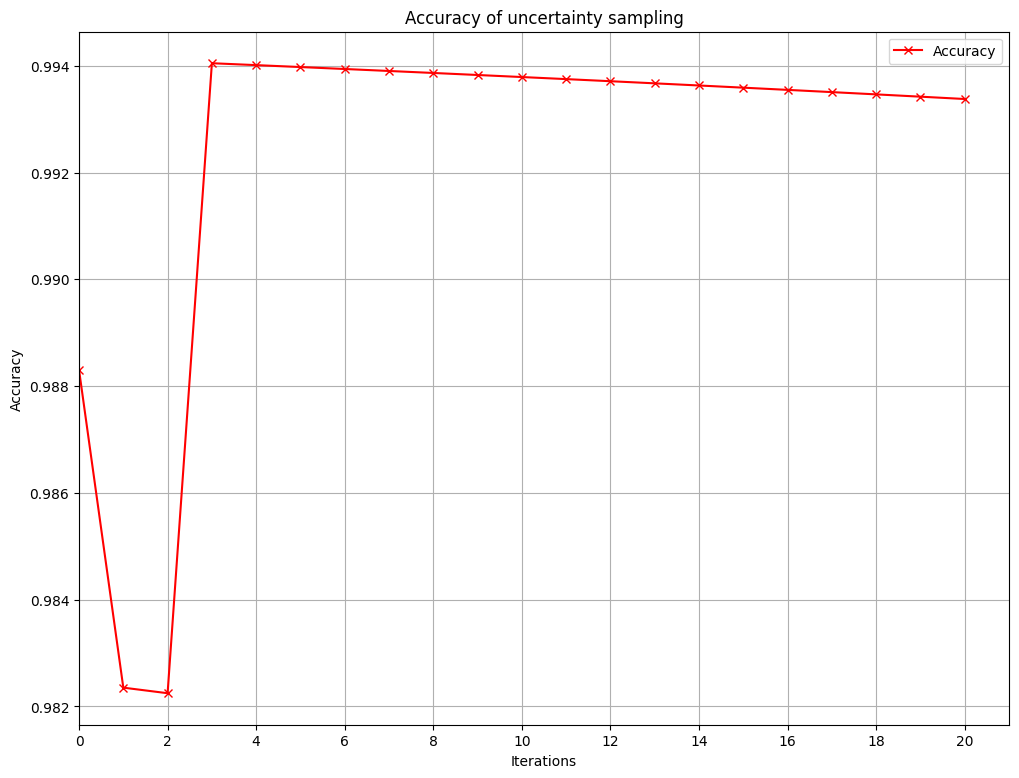

In [12]:
plt.figure(figsize=(12, 9))
plt.plot(range(len(accuracy_list)), accuracy_list, marker='x', label='Accuracy', color='red')
plt.title("Accuracy of uncertainty sampling")
plt.xlabel("Iterations")
plt.xticks(range(0, 21, 2))
plt.xlim((0, 21))
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

### Dataset-2: Iris

In [13]:
X, y = get_iris()

In [14]:
accuracy_list = uncertainty_sampling_func(X, y)

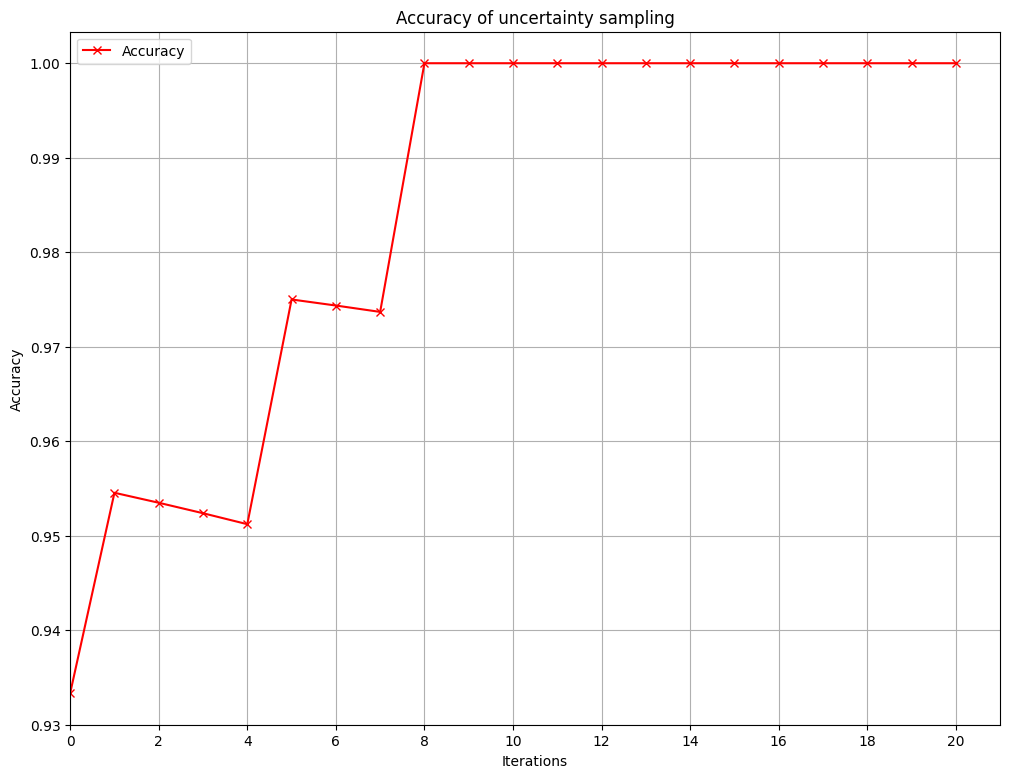

In [15]:
plt.figure(figsize=(12, 9))
plt.plot(range(len(accuracy_list)), accuracy_list, marker='x', label='Accuracy', color='red')
plt.title("Accuracy of uncertainty sampling")
plt.xlabel("Iterations")
plt.xticks(range(0, 21, 2))
plt.xlim((0, 21))
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## Expected Error Reduction

### Dataset-1: Breast Cancer

In [2]:
X, y = get_breast_cancer()

In [3]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
results = active_learning_with_eer(base_model, X, y, n_initial=10, n_queries=7)

Initial accuracy: 0.895

Query 1/7...
Done in 138.30s | Accuracy: 0.889

Query 2/7...
Done in 131.54s | Accuracy: 0.895

Query 3/7...
Done in 124.81s | Accuracy: 0.895

Query 4/7...
Done in 126.39s | Accuracy: 0.912

Query 5/7...
Done in 126.65s | Accuracy: 0.918

Query 6/7...
Done in 115.12s | Accuracy: 0.901

Query 7/7...
Done in 122.28s | Accuracy: 0.906


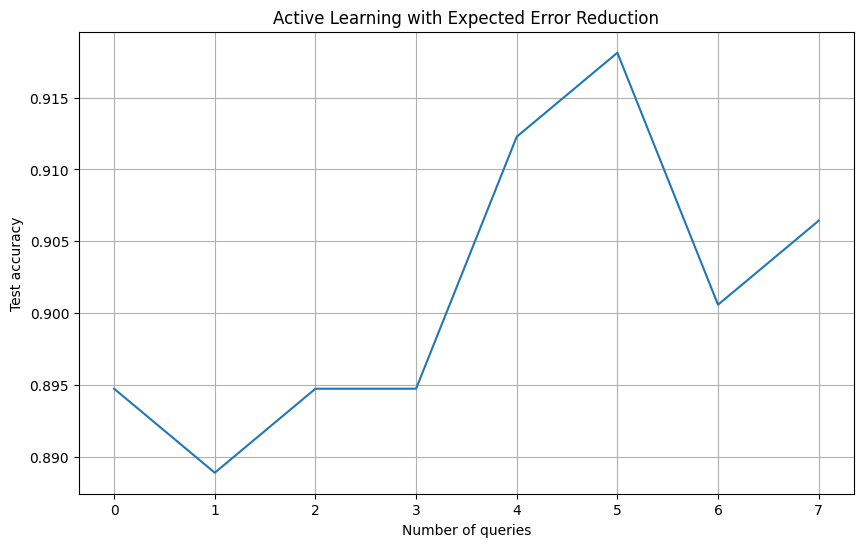

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(results['performance_history'])), results['performance_history'])
plt.xlabel('Number of queries')
plt.ylabel('Test accuracy')
plt.title('Active Learning with Expected Error Reduction')
plt.grid(True)
plt.show()

### Dataset-2: Iris

In [9]:
X, y = get_iris()

In [10]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
results = active_learning_with_eer(base_model, X, y, n_initial=10, n_queries=10)

Initial accuracy: 0.889

Query 1/10...
Done in 51.67s | Accuracy: 0.867

Query 2/10...
Done in 46.13s | Accuracy: 0.889

Query 3/10...
Done in 43.95s | Accuracy: 0.867

Query 4/10...
Done in 45.81s | Accuracy: 0.889

Query 5/10...
Done in 40.82s | Accuracy: 0.889

Query 6/10...
Done in 38.86s | Accuracy: 0.867

Query 7/10...
Done in 43.35s | Accuracy: 0.844

Query 8/10...
Done in 42.46s | Accuracy: 0.844

Query 9/10...
Done in 41.61s | Accuracy: 0.867

Query 10/10...
Done in 44.44s | Accuracy: 0.889


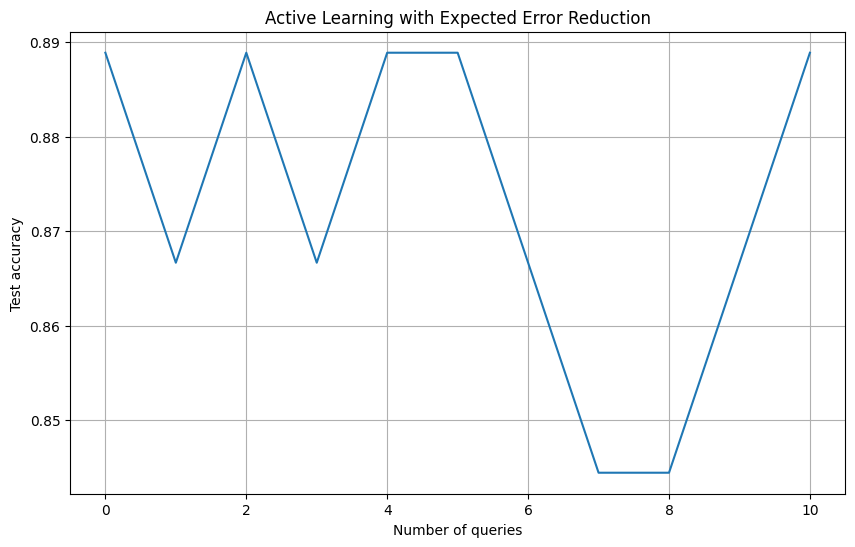

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(results['performance_history'])), results['performance_history'])
plt.xlabel('Number of queries')
plt.ylabel('Test accuracy')
plt.title('Active Learning with Expected Error Reduction')
plt.grid(True)
plt.show()